# Able to read, write image files and perform image transformations such as rotation, scaling, filtering etc. using OpenCV  


In [ ]:
pip install opencv.python

     |████████████████████████████████| 50.4MB 77kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


In [ ]:
import os
import cv2

In [ ]:
from google.colab import files

uploaded = files.upload()


Saving car.png to car.png


# imread()
#imshow()

In [ ]:
car = cv2.imread('car.png')

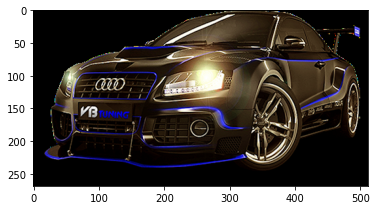

In [ ]:
plt.imshow(car);

In [ ]:
# cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
# cv2.imshow('car_image', car)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

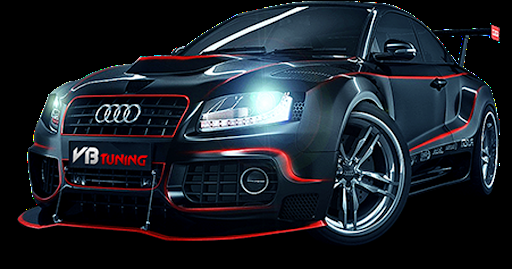

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(car)

In [ ]:
car_height, car_width, car_number_of_channels = car.shape

In [ ]:
car_height, car_width, car_number_of_channels

(269, 512, 3)

In [ ]:
car_grayscale = cv2.imread('car.png', cv2.IMREAD_GRAYSCALE) 

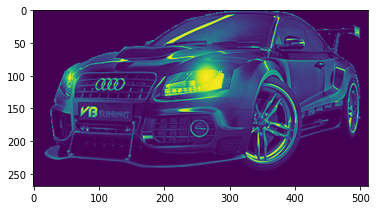

In [ ]:
plt.imshow(car_grayscale);

In [ ]:
grayscale_height, grayscale_width = car_grayscale.shape

In [ ]:
grayscale_height, grayscale_width

(269, 512)

In [ ]:
car_color = cv2.imread('car.png', cv2.IMREAD_COLOR)

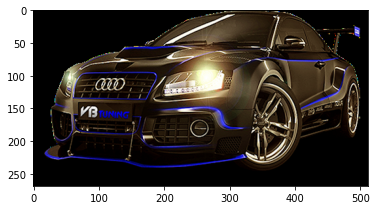

In [ ]:
plt.imshow(car_color);

In [ ]:
color_height, color_width, color_number_of_channels = car_color.shape

In [ ]:
color_height, color_width, color_number_of_channels

(269, 512, 3)

In [ ]:
car_unchanged = cv2.imread('car.png', cv2.IMREAD_UNCHANGED) 
# This flag is used to return the loaded image as is (with alpha channel)
# to read the transparency channel along with the color channels. 
# all the four channels of the image, namely Red, Green, Blue and Transparency.

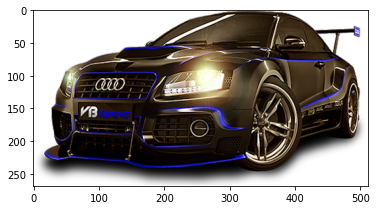

In [ ]:
plt.imshow(car_unchanged);

In [ ]:
unchanged_height, unchanged_width, unchanged_number_of_channels = car_unchanged.shape

In [ ]:
unchanged_height, unchanged_width, unchanged_number_of_channels

(269, 512, 4)

# imwrite()

In [ ]:
cv2.imwrite('mycar.png', car)

True

In [ ]:
# In Jupyter Notebook
# car_unchanged = cv2.imread('car.png', cv2.IMREAD_UNCHANGED) 
# cv2.imshow('car_image', car_unchanged)
# keypressed = cv2.waitKey(0) & OxFF # for 64 bit OS
# if keypressed == 27: # esc or close 
  # cv2.destroyAllWindows()
# elif keypressed == ord('s'):
  # cv2.imwrite('mycar.png', car_unchanged)
  # cv2.destroyAllWindows()


# rotate()

In [ ]:
rotatecar90 = cv2.rotate(car, cv2.ROTATE_90_CLOCKWISE) # rotateCode = 0

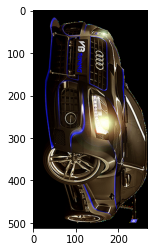

In [ ]:
plt.imshow(rotatecar90);

In [ ]:
rotatecar180 = cv2.rotate(car, cv2.ROTATE_180) # rotateCode = 1

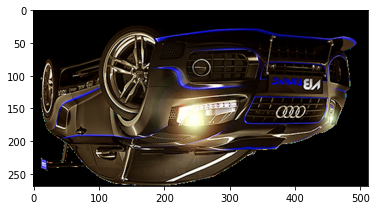

In [ ]:
plt.imshow(rotatecar180);

In [ ]:
rotatecar270 = cv2.rotate(car, cv2.ROTATE_90_COUNTERCLOCKWISE) # rotateCode = 2

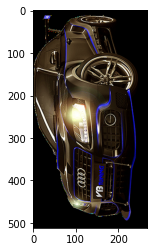

In [ ]:
plt.imshow(rotatecar270);

# warpAffine()

In [ ]:
# car_number_of_channels
center = (unchanged_height//2, unchanged_width//2)
center

(134, 256)

In [ ]:
rotation_matrix = cv2.getRotationMatrix2D(center, 30, .65) 

In [ ]:
rotate30 = cv2.warpAffine(car_unchanged, rotation_matrix, (unchanged_width, unchanged_height))

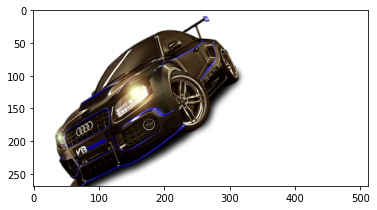

In [ ]:
plt.imshow(rotate30);

In [ ]:
rotation_matrix_neg = cv2.getRotationMatrix2D(center, -15, 0.90) 

In [ ]:
rotate15neg = cv2.warpAffine(car_unchanged, rotation_matrix_neg, (unchanged_width, unchanged_height))

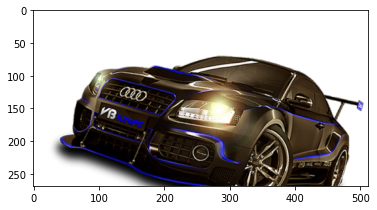

In [ ]:
plt.imshow(rotate15neg);

In [ ]:
shiftmat = np.float32([[1, 0, 50], [0, 1, 50]]) # shift(x = 50, y = 50)
shift_car = cv2.warpAffine(car_unchanged, shiftmat, (unchanged_width, unchanged_height))

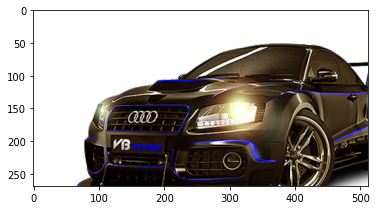

In [ ]:
plt.imshow(shift_car)

# resize()  

In [ ]:
car_height, car_width, car_number_of_channels

(269, 512, 3)

In [ ]:
resized_height, resized_width = 750, 750
 
resized_car1 = cv2.resize(car,(resized_height, resized_width)) # dimension in tuple

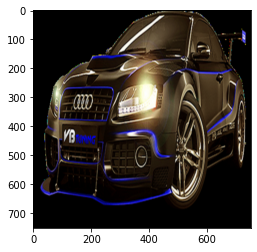

In [ ]:
plt.imshow(resized_car1);

In [ ]:
resized_car2 = cv2.resize(car, (0,0), fx=0.5, fy = 0.5) # resize using the scaling factor fx, fy to 50%

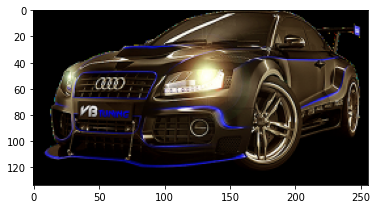

In [ ]:
plt.imshow(resized_car2)

In [ ]:
resized_height, resized_width = car_height, car_width // 2
resized_car3 = cv2.resize(car,(resized_height, resized_width), interpolation = cv2.INTER_AREA) # interpolation by using pixel area relation 

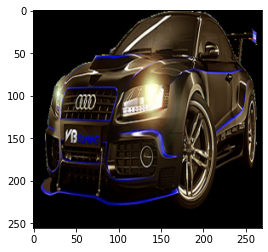

In [ ]:
plt.imshow(resized_car3);

# filter2D()  

In [ ]:
kernel = np.ones((5,5),np.float32)/20
kernel

array([[0.05, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05],
       [0.05, 0.05, 0.05, 0.05, 0.05]], dtype=float32)

In [ ]:
filter_car = cv2.filter2D(car, ddepth = -1, kernel = kernel)  

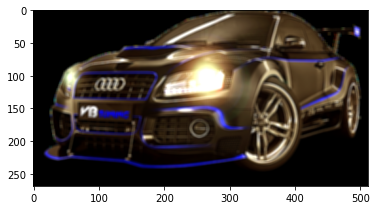

In [ ]:
plt.imshow(filter_car);

# flip()

In [ ]:
flipcar = cv2.flip(car, 1) #mirror

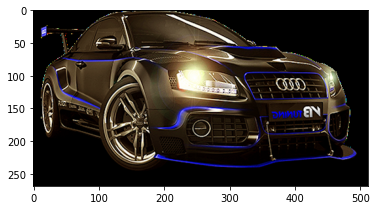

In [ ]:
plt.imshow(flipcar)

# Canny()  

In [ ]:
edge_detection1 = cv2.Canny(car, 100, 200) #Minimum intensity gradient = 100 and Maximum intensity gradient = 200

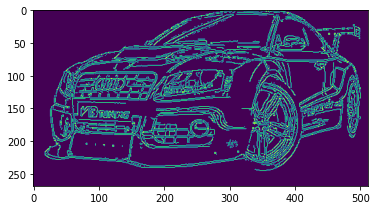

In [ ]:
plt.imshow(edge_detection1);

In [ ]:
edge_detection2 = cv2.Canny(car_unchanged, 100, 200) #Minimum intensity gradient = 100 and Maximum intensity gradient = 200

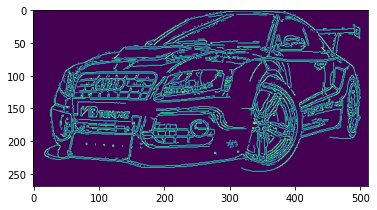

In [ ]:
plt.imshow(edge_detection2);

In [ ]:
edge_detection3 = cv2.Canny(car, 100, 200, apertureSize = 5)
#Minimum intensity gradient = 100 and Maximum intensity gradient = 200. Kernel(matrix) for the Sobel filter

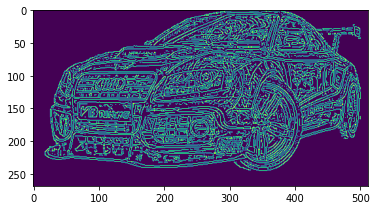

In [ ]:
plt.imshow(edge_detection3);

In [ ]:
edge_detection4 = cv2.Canny(car, 100, 200, L2gradient = True)
#Minimum intensity gradient = 100, Maximum intensity gradient = 200, and gradient magnitude

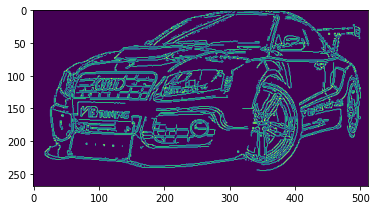

In [ ]:
plt.imshow(edge_detection4);

In [ ]:
edge_detection5 = cv2.Canny(car, 100, 200, apertureSize = 5, L2gradient = True)
#Minimum intensity gradient = 100, Maximum intensity gradient = 200, and gradient magnitude. Kernel(matrix) for the Sobel filter

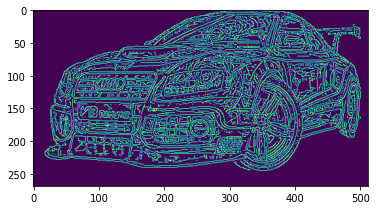

In [ ]:
plt.imshow(edge_detection5);

# Slicing the image  

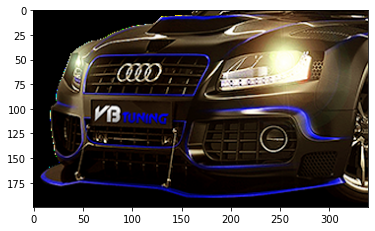

In [ ]:
car_cropped = car[50:250, 10:350]
plt.imshow(car_cropped);

# GaussianBlur()  

In [ ]:
blurred_car1 = cv2.GaussianBlur(car, (5, 5), cv2.BORDER_DEFAULT) # odd Kernal size and default boundaries

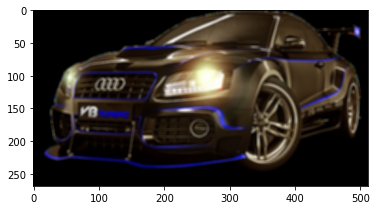

In [ ]:
plt.imshow(blurred_car1);

In [ ]:
blurred_car2 = cv2.GaussianBlur(car, (5, 5), 5, cv2.BORDER_DEFAULT) # odd Kernal size, default boundaries and sigmaX Standard deviation value of kernal along horizontal direction.

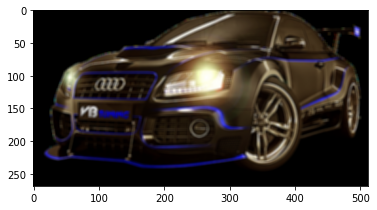

In [ ]:
plt.imshow(blurred_car2);